In [116]:
%matplotlib widget
import csv
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 15)


# RFX Geometry Coils (in cartitian coords)

In [128]:
def makeCircularCoil(num_points, radius, current, z=0):
    """
    Generates points for a circular coil.

    Args:
        num_points: Number of points to generate.
        radius: Radius of the circle.
        current: The constant 'i' value for each point.
        z: The constant z-coordinate.

    Returns:
        A NumPy array of points (x, y, z, i, None, None).
    """
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    # Initial x and y coordinates on the XY plane
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Set the z, i, and placeholder columns
    z = np.full(num_points, z)
    i = np.full(num_points, current)
    
    # Stack the arrays to form the final point matrix
    points = np.vstack((x, y, z, i, [None] * num_points, [None] * num_points)).T
    return points

In [129]:
def addCoilToListDF(listdf,points,groupnumer,name,graph=None):    
    """
    Adds points to 'listdf' List

    Args:
        listdf: Dataframe list.
        points: List of 'points' to add.
        groupnumer: Metadata group number.
        name: Metadata group name.
        graph: (Optional) matplotlib axis variable to plot coil.

    Returns:
        'listdf' with appropriate addition
    """
    points[-1][3] = 0
    points[-1][4] = groupnumer
    points[-1][5] = name

    df = pd.DataFrame(points, columns=listdf.columns)
    if graph:
        graph.plot(df['x'],df['y'],df['z'], 
                   color= "r" if df['i'].iloc[0]>0 else "b",
                   marker = '', lw=1)
    
    listdf = pd.concat([listdf,df],ignore_index=True)
    return listdf

In [130]:
rfx = pd.DataFrame(columns=['x','y','z','i','group number', 'name']).astype({'x': float,'y': float,'z': float,'i': float,'group number': str,'name': str})

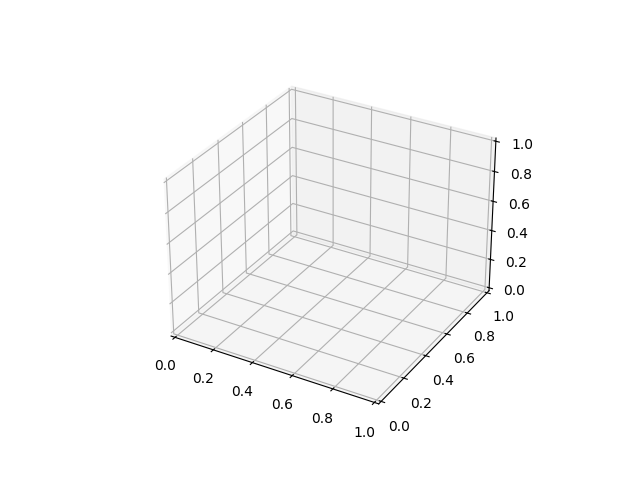

In [131]:
plt.clf()
#Graph Confinement
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [132]:
rfx = rfx.head(0) # Clean start

In [133]:
#For Hard Core Region
radius_major = 2 
radius_minor = 0.2
current = 2e6

num_points = 201

# Adding N central coils to structure
N = 12
for i in range(0,N):
    sinOffset = np.sin((2*np.pi) * (i/N)) * radius_minor
    cosOffset = np.cos((2*np.pi) * (i/N)) * radius_minor
    coil = makeCircularCoil(num_points = num_points,
                            radius = radius_major + sinOffset, 
                            current = current,
                            z = cosOffset)
    groupnumer = 1
    name = 'HardCore'
    rfx = addCoilToListDF(rfx,coil,groupnumer,name+'_'+str(i+1),graph=ax) #With Suffix
    # rfx = addCoilToListDF(rfx,coil,groupnumer,name,graph=ax)

In [134]:
#For External Core Region
radius_major = 2 
radius_minor = 0.5
current = -2e6

num_points = 201

# Adding N central coils to structure
N = 36
for i in range(0,N):
    sinOffset = np.sin((2*np.pi) * (i/N)) * radius_minor
    cosOffset = np.cos((2*np.pi) * (i/N)) * radius_minor
    coil = makeCircularCoil(num_points = num_points,
                            radius = radius_major + sinOffset, 
                            current = current,
                            z = cosOffset)

    groupnumer = 2
    name = 'External'
    rfx = addCoilToListDF(rfx,coil,groupnumer,name+'_'+str(i+1),graph=ax) #With Suffix
    # rfx = addCoilToListDF(rfx,coil,groupnumer,name,graph=ax)

In [135]:
plt.axis('equal');
rfx[~rfx['name'].isna()]

,x,y,z,i,group number,name
200,2.0,-0.0,0.2,0,1,HardCore_1
401,2.1,-0.000000000000001,0.173205080756888,0,1,HardCore_2
602,2.173205080756888,-0.000000000000001,0.1,0,1,HardCore_3
803,2.2,-0.000000000000001,0.0,0,1,HardCore_4
1004,2.173205080756888,-0.000000000000001,-0.1,0,1,HardCore_5
1205,2.1,-0.000000000000001,-0.173205080756888,0,1,HardCore_6
1406,2.0,-0.0,-0.2,0,1,HardCore_7
1607,1.9,-0.0,-0.173205080756888,0,1,HardCore_8
1808,1.826794919243112,-0.0,-0.1,0,1,HardCore_9
2009,1.8,-0.0,-0.0,0,1,HardCore_10


In [136]:
save = rfx.copy(deep=True)

In [138]:
# Define the custom formatting and joining function for a row
def format_row(row):
    formatted_parts = []
    for col_name in ['x', 'y', 'z', 'i']:
        temp = f'{row[col_name]:.14e}'.upper()
        if temp[0]!='-': temp = ' '+temp
        formatted_parts += [temp]
    if row['group number'] and row['name']:
        formatted_parts.append(str(row['group number']))
        formatted_parts.append(str(row['name']))    
    return '  '.join(formatted_parts)

with open('./coils.rfx', 'w') as f: #With Suffix
# with open('./coils_wos.rfx', 'w') as f:
    f.write('periods 1\n')
    f.write('begin filament \n')
    f.write('mirror NIL \n')
    for index, row in save.iterrows():
        f.write(format_row(row) + '\n')
    f.write('end \n')
    

# RFX Geomentry Coils (in RZ coords)

In [139]:
def addCoilToListDF_RZ(listdf,coil):    
    """
    Adds points to 'listdf' List

    Args:
        listdf: Dataframe list.
        coil: Array with coil data of shape (radius, z, current, name).
    Returns:
        'listdf' with appropriate addition
    """
    df = pd.DataFrame([coil], columns=listdf.columns)
    listdf = pd.concat([listdf,df],ignore_index=True)
    return listdf

In [146]:
rfx_rz = pd.DataFrame(columns=['radius','z','i', 'name']).astype({'radius': float,'z': float,'i': float,'name': str})

In [147]:
#For Hard Core Region
radius_major = 2 
radius_minor = 0.2
current = 2e6

# Adding N central coils to structure
N = 12
for i in range(0,N):
    sinOffset = np.sin((2*np.pi) * (i/N)) * radius_minor
    cosOffset = np.cos((2*np.pi) * (i/N)) * radius_minor

    coil = [radius_major + sinOffset, cosOffset, current, 'HardCore'+str(i+1)]
    # coil = [radius_major + sinOffset, cosOffset, current, 'HardCore'] #without suffix
    rfx_rz = addCoilToListDF_RZ(rfx_rz,coil)

In [148]:
#For External Core Region
radius_major = 2 
radius_minor = 0.5
current = -2e6

# Adding N central coils to structure
N = 36
for i in range(0,N):
    sinOffset = np.sin((2*np.pi) * (i/N)) * radius_minor
    cosOffset = np.cos((2*np.pi) * (i/N)) * radius_minor
    coil = [radius_major + sinOffset, cosOffset, current, 'External'+str(i+1)]
    # coil = [radius_major + sinOffset, cosOffset, current, 'External'] #without suffix
    rfx_rz = addCoilToListDF_RZ(rfx_rz,coil)

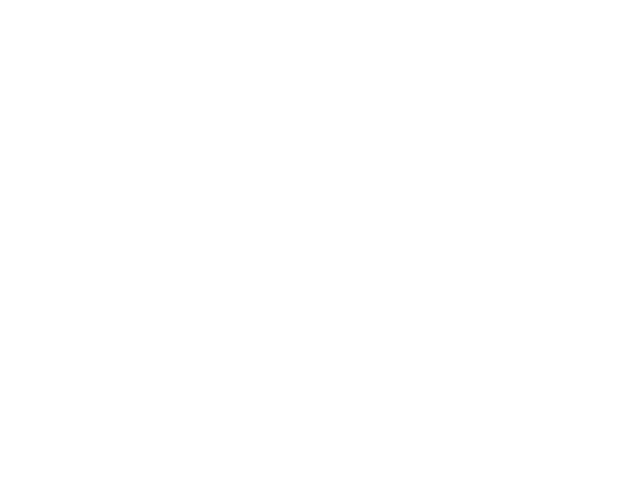

In [149]:
plt.clf()
fig = plt.figure()

In [150]:
ax = fig.add_subplot(111, projection='3d')
num_points=201
for i, row in rfx_rz.iterrows():
    [radius,z,current,name] = row
    ax.plot(radius * np.cos(np.linspace(0, 2 * np.pi, num_points)), 
            radius * np.sin(np.linspace(0, 2 * np.pi, num_points)),
            np.full(num_points, z), 
            color= "r" if current>0 else "b")
ax.axis("equal");

In [151]:
# rfx_rz.to_csv("./coils_wos.cvs",index=False)
rfx_rz.to_csv("./coils.cvs",index=False)

# Plotting MAKEFILE Results

In [12]:
from scipy.io import netcdf_file

In [13]:
file = netcdf_file('/mnt/Windows/LINUXFOLDERS/Duetelio/DebMech/mgrid_rfx.nc','r')